# Desafío Data Science Latam

## Importa librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Carga archivo de datos

In [2]:
latamDF = pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I','Fecha-O'])
latamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

C:\Users\an2fe\anaconda3v2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Pregunta 1
### ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Los datos estan claramente diferenciados entre programados y operado, lo cual facilita determinar cuáles vuelos se retrasaron. En ambos casos (programado y operado), se incluye información en la fecha y hora, número de vuelo, ciudades de origen y destino, y código de la aerolinea.

Adicionalmente se incluye columnas individuales para el dia, mes, y año en que los vuelos fueron operados. Inicialmente esta información parece redundante con la columna "Fecha-O". Adicionalmente se incluye el día de la semana, el cuál puede ser relevante para predecir el retraso de un vuelo.

Una columna con el tipo de vuelo (Nacional o Internacional), la cuál también puede ser de importancia para la predicción.

Finalmente, se tienen tres columnas con los nombres completos de la aerolinea operadora, ciudad de origen y ciudad de destino. Esta información es redundante con las columnas "Ori-O", "Des-O", "Emp-O".  

A continuación se realizará una exploración de los datos para conocer más en detalle la distribución de los datos en el tiempo.

In [3]:
#Agrupa los vuelos por año
latamDF.groupby(latamDF['Fecha-O'].dt.year).count()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-O,,,,,,,,,,,,,,,,,,
2017,68204,68204,68204,68204,68204,68204,68203,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204
2018,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


La gran mayoría de los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis

In [4]:
#Muestra los 2 vuelos del 2018
latamDF[latamDF['Fecha-O'].dt.year==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Los 2 vuelos operados en el 2018 fueron vuelos programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados en el 2018.

In [5]:
#Agrupa y muestra los vuelos por por mes y día
latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-I,,,,,,,,,,,,,,,,,
2017-01-01,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
2017-01-02,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
2017-01-03,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
2017-01-04,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
2017-01-05,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
2017-12-28,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
2017-12-29,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220


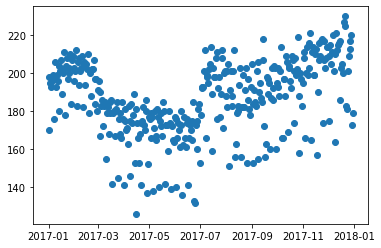

In [6]:
#Grafica la distribución de los vuelos por mes y día
countMD = latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
plt.scatter(countMD.index,countMD['Fecha-O'])

Se nota un claro decrecimiento en el número de vuelos entre marzo y julio.  Desde julio, los vuelos incrementan constantemente hasta el final del año (aparentemente de manera lineal).  Enero y febrero también muestran un grán número de vuelos.

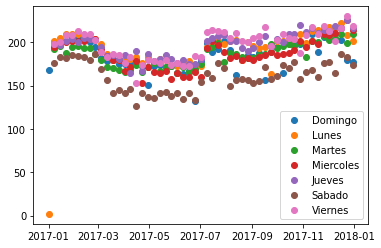

In [7]:
#Revisa la distribución por los días de la semana
#El ciclo for se utiliza para aislar los vuelos correspondientes a cada día de la semana
#Y añadir 7 scatter plots a la misma gráfica
weekD = latamDF.DIANOM.unique().tolist()
for x in weekD:
    latamDF_week = latamDF.loc[latamDF['DIANOM']==x]
    countMD = latamDF_week.groupby(pd.Grouper(key='Fecha-I',freq='W')).count()
    ax = plt.scatter(countMD.index,countMD['Fecha-O'],label=x)

plt.legend();
plt.show()

Se observa que los sabados tienen un menor número de vuelos de manera consistente, mientras los jueves y viernes tienden a ser los días con un mayor número de vuelos.

## Resumen pregunta 1
Todos los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis.  Existen 2 vuelos que fueron operados en el 2018, los cuales fueron programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados el primero de enero del 2018.

El número de vuelos entre marzo y julio es mucho menor que el resto del año.  Desde julio, los vuelos incrementan constantemente hasta el final del año (aparentemente de manera lineal).  Enero y febrero también muestran un grán número de vuelos.

Los sabados tienen un menor número de vuelos de manera consistente a través del año, mientras los jueves y viernes tienden a ser los días con un mayor número de vuelos.

# Pregunta 2
## Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

In [8]:
#Temporada alta
#Defino función que realiza la diferenciación entre temporada alta y temporada baja
def temporada(row):  
    if ((row['Fecha-I'] > pd.Timestamp(2017, 12, 15) or row['Fecha-I'] < pd.Timestamp(2017, 3, 3)) 
        or (row['Fecha-I'] > pd.Timestamp(2017, 9, 11) and row['Fecha-I'] < pd.Timestamp(2017, 9, 30))
            or (row['Fecha-I'] > pd.Timestamp(2017, 7, 15) and row['Fecha-I'] < pd.Timestamp(2017, 7, 31))):
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe original
latamDF['temporada_alta']=latamDF.apply(lambda row: temporada(row),axis=1)


In [9]:
#dif_mim
#Calcula la diferencia entre las fechas y luego la convierte a minutos
latamDF['dif_min'] = (latamDF['Fecha-O'] - latamDF['Fecha-I'])
latamDF['dif_min'] = latamDF['dif_min']/np.timedelta64(1,'m')

In [10]:
#atraso_15
#Defino función que realiza la diferenciación entre atraso o no
def se_atraso(row):  
    if row['dif_min'] > 15:
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe
latamDF['atraso_15']=latamDF.apply(lambda row: se_atraso(row),axis=1)

In [11]:
#periodo_dia
#Defino función que realiza la diferenciación entre las horas del día
def periodo(row):  
    if row['Fecha-I'].hour >= 5  and (row['Fecha-I'].hour <= 11 and  row['Fecha-I'].minute <= 59):
        return 'mañana'
    elif row['Fecha-I'].hour >= 12 and (row['Fecha-I'].hour <= 18 and  row['Fecha-I'].minute <= 59):
        return 'tarde'
    else:
        return 'noche'

#Aplico la función a todo el dataframe
latamDF['periodo_dia']=latamDF.apply(lambda row: periodo(row),axis=1)   

In [12]:
#Exporta el dataframe a .csv
latamDF.to_csv('synthetic_features.csv')

# Pregunta 3
## ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [13]:
#Generaré dos dataframes, uno con los vuelos atrasados y otro con los vuelos a tiempo.  Esto permitirá 
#calcular las tasas de atraso respectiva
latamDFatrasado = latamDF.loc[latamDF['atraso_15']==1]
latamDFatiempo = latamDF.loc[latamDF['atraso_15']==0]

### Tasa de atraso por destino

In [14]:
#Tasa de atraso por destino

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por destino
destinoAtrasado = latamDFatrasado.groupby(['SIGLADES']).count().unstack(fill_value=0)['Fecha-I']
destinoAtiempo = latamDFatiempo.groupby(['SIGLADES']).count().unstack(fill_value=0)['Fecha-I']

destinoAtrasado = destinoAtrasado.sort_values(ascending=False)

#Calcula la tasa de atraso por destino y las organiza de manera descendiente
destino_tasa_atraso = destinoAtrasado/(destinoAtrasado + destinoAtiempo)
destino_tasa_atraso = destino_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='SIGLADES'>

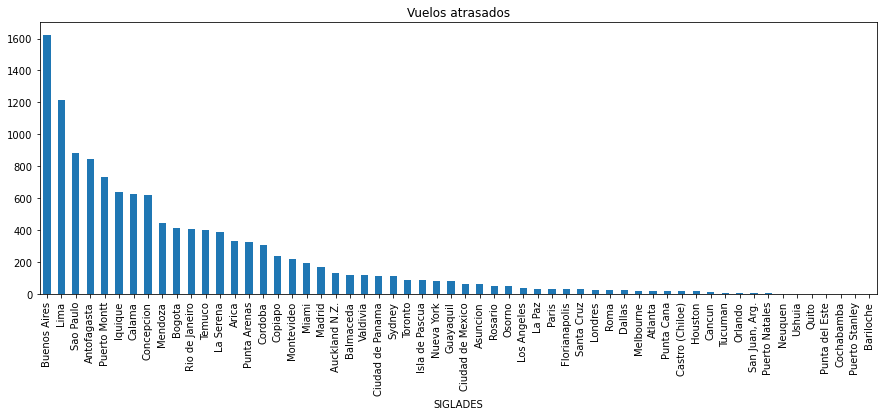

In [15]:
#Grafica los resultados
destinoAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='SIGLADES'>

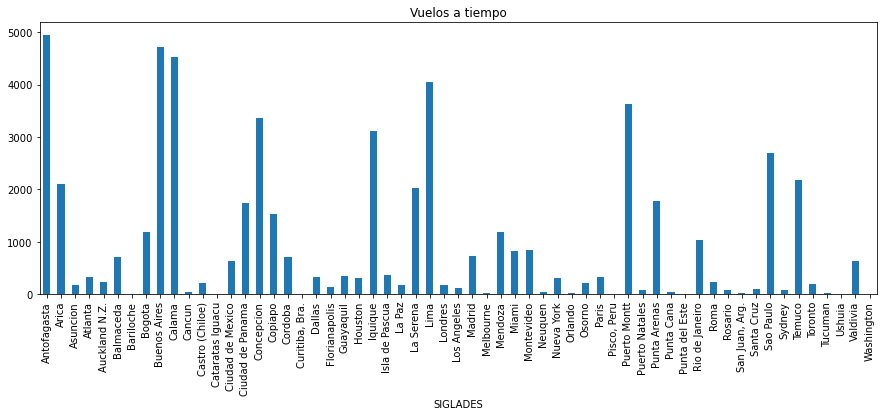

In [16]:
destinoAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por destino'}, xlabel='SIGLADES'>

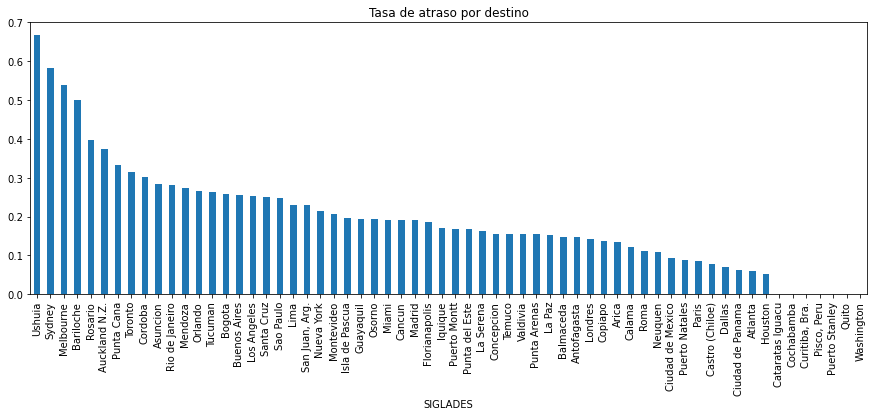

In [17]:
destino_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por destino')

Se observa que Ushuia tiene una tasa de retraso de casi 70%, seguido de Sydney, Melbourne, y Bariloche con tasas entre 50% y 60%.  Los destinos con menor tasa de retrasos son Ciudad de Panamá, Atlanta y Houston, con tasas menores al 10%.  

Los casos especiales de Cataratas de Iguacu, Cochabamba, Curitiba. Bra, Pisco Peru, Puerto Stanley, Quito, y Washington no muestran un dato válido. Este es debido a un número muy reducido de vuelos con todos siendo a tiempo o retrasados.

Cochabamba, Pisco Peru, Puerto Stanley, Quito todos los vuelos estuvieron retrasados.
Cataratas de Iguacu,  Curitiba. Bra, Washington todos los vuelos estuvieron a tiempo.

### Tasa de atraso por aerolinea

In [18]:
#Tasa de atraso por aerolinea

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por aerolinea
aerolineaAtrasado = latamDFatrasado.groupby(['OPERA']).count().unstack(fill_value=0)['Fecha-I']
aerolineaAtiempo = latamDFatiempo.groupby(['OPERA']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por aerolinea y las organiza de manera descendiente
aerolinea_tasa_atraso = aerolineaAtrasado/(aerolineaAtrasado + aerolineaAtiempo)
aerolinea_tasa_atraso = aerolinea_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='OPERA'>

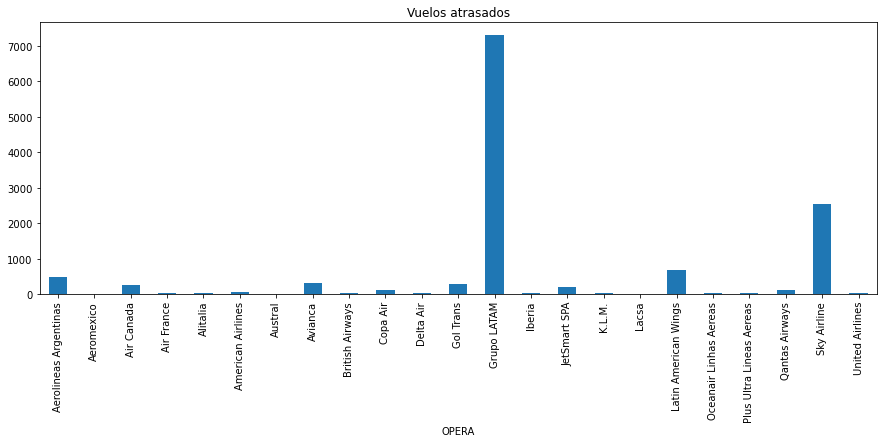

In [19]:
#Grafica los resultados
aerolineaAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='OPERA'>

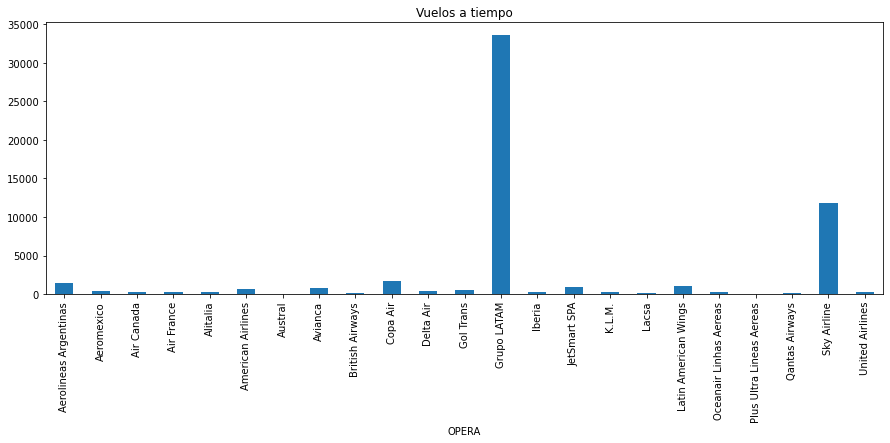

In [20]:
aerolineaAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por aerolinea'}, xlabel='OPERA'>

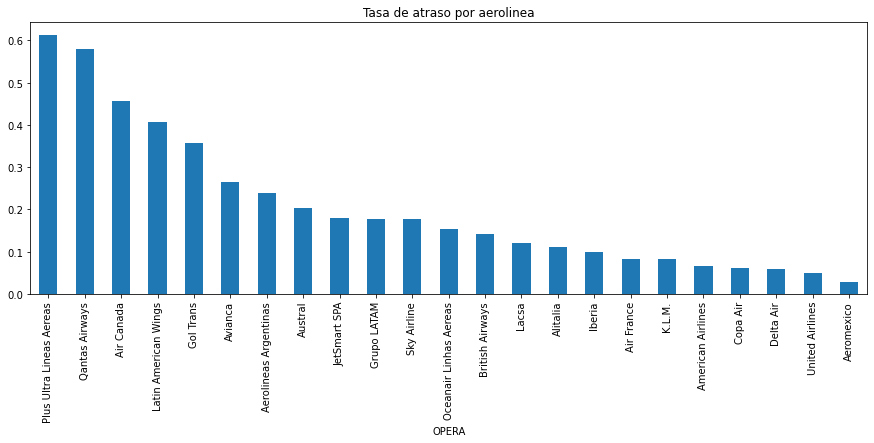

In [21]:
aerolinea_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por aerolinea')

Se observa que Plus Ultra Lineas Aereas tiene una tasa de retraso de más de 60%, seguido de Qantas Airways, Air Canada, y Latin American Wings con tasas entre 40% y 60%.  Las aerolineas con menor tasa de retrasos son Delta Air, United Airlines y Aeromexico, con tasas menores al 10%.  

### Tasa de atraso por mes

In [22]:
#Tasa de atraso por mes

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por mes
mesAtrasado = latamDFatrasado.groupby(['MES']).count().unstack(fill_value=0)['Fecha-I']
mesAtiempo = latamDFatiempo.groupby(['MES']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por mes y las organiza de manera descendiente
mes_tasa_atraso = mesAtrasado/(mesAtrasado + mesAtiempo)
mes_tasa_atraso = mes_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='MES'>

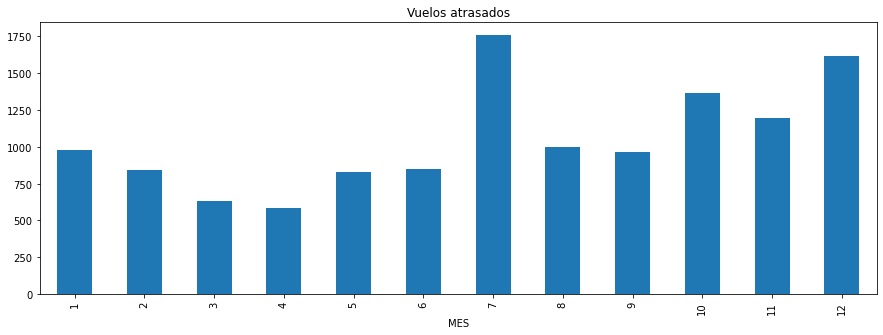

In [23]:
#Grafica los resultados
mesAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='MES'>

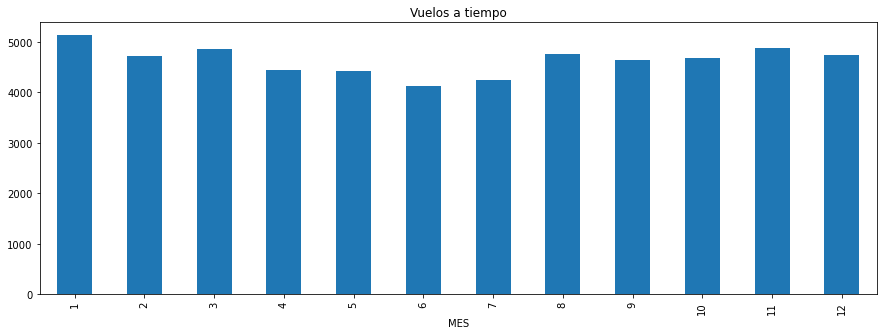

In [24]:
mesAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por mes'}, xlabel='MES'>

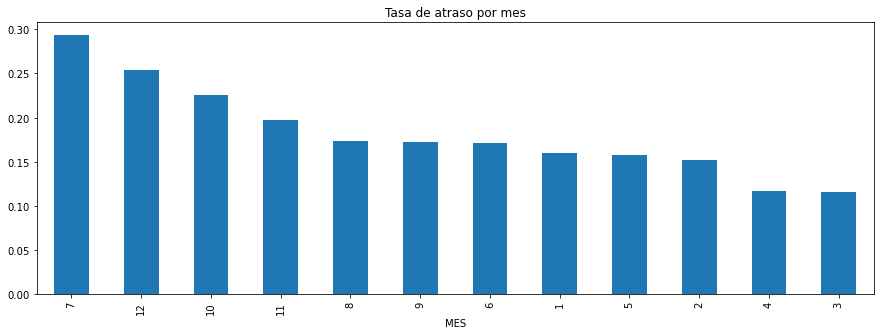

In [25]:
mes_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por mes')

Se observa que Julio y Diciembre tienen las mayores tasas de retraso, mientras marzo y abril tienen las menores.  Esto puede estar relacionada a periodos de temporada alta y temporada baja, respectivamente.

### Tasa de atraso por día de la semana

In [26]:
#Tasa de atraso por día de la semana

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por dia de la semana
dSemanaAtrasado = latamDFatrasado.groupby(['DIANOM']).count().unstack(fill_value=0)['Fecha-I']
dSemanaAtiempo = latamDFatiempo.groupby(['DIANOM']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por dia de la semana y las organiza de manera descendiente
dSemana_tasa_atraso = dSemanaAtrasado/(dSemanaAtrasado + dSemanaAtiempo)
dSemana_tasa_atraso = dSemana_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='DIANOM'>

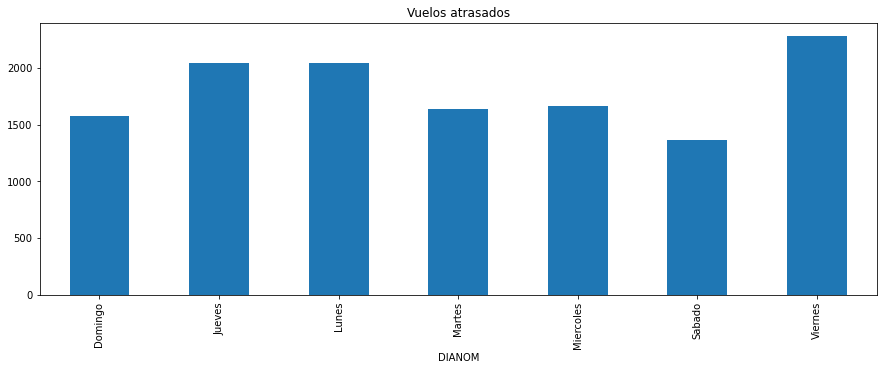

In [27]:
#Grafica los resultados
dSemanaAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='DIANOM'>

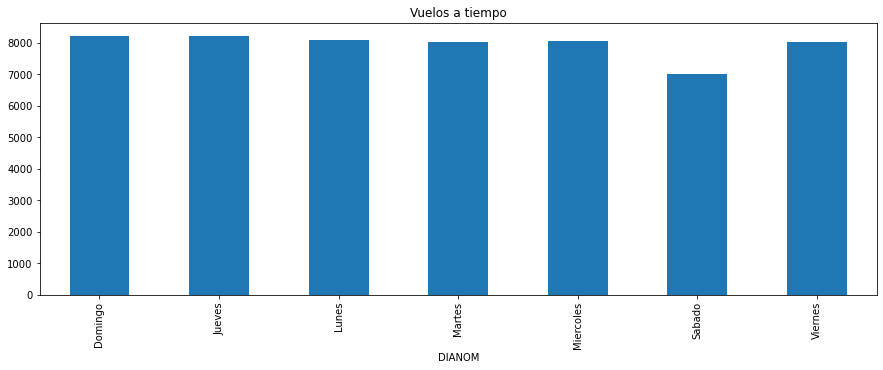

In [28]:
dSemanaAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por dia de la semana'}, xlabel='DIANOM'>

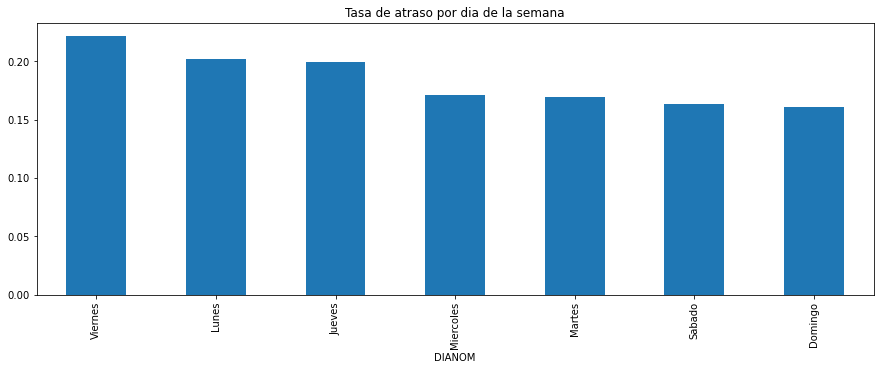

In [29]:
dSemana_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por dia de la semana')

Se observa que los viernes, lunes y jueves tienen las mayores tasas de retraso, y los sabados y domingos tienen las menores. Esto esta directamente relacionado con el número de vuelos en cada uno de estos días.

### Tasa de atraso por temporada

In [30]:
#Tasa de atraso por temporada

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por temporada
temporadaAtrasado = latamDFatrasado.groupby(['temporada_alta']).count().unstack(fill_value=0)['Fecha-I']
temporadaAtiempo = latamDFatiempo.groupby(['temporada_alta']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por temporada y las organiza de manera descendiente
temporada_tasa_atraso = temporadaAtrasado/(temporadaAtrasado + temporadaAtiempo)
temporada_tasa_atraso = temporada_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='temporada_alta'>

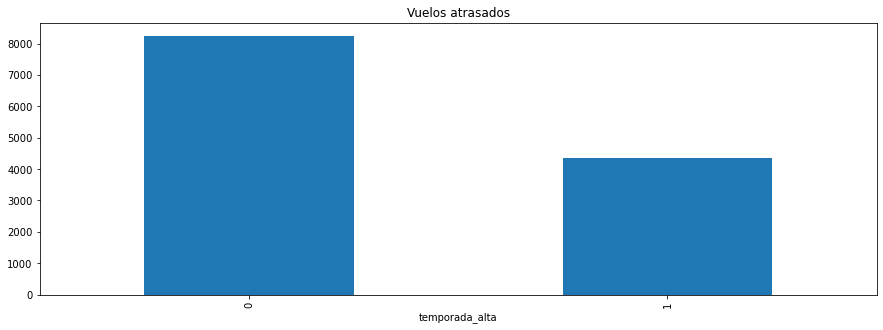

In [31]:
#Grafica los resultados
temporadaAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='temporada_alta'>

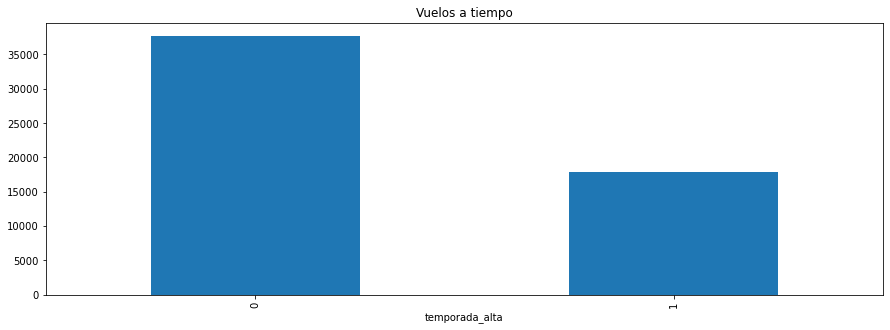

In [32]:
temporadaAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por temporada'}, xlabel='temporada_alta'>

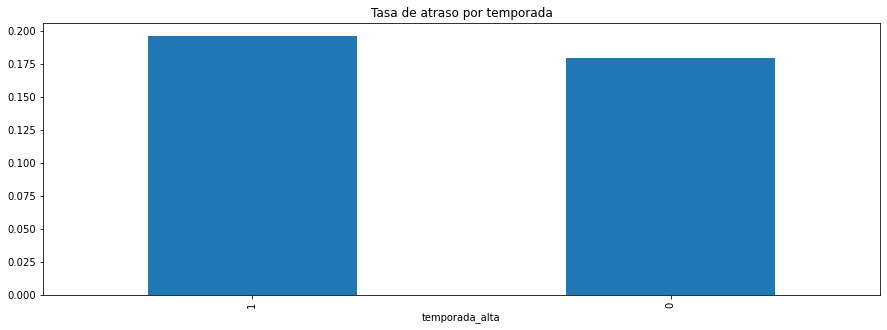

In [33]:
temporada_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por temporada')

Se observa que los vuelos en temporada alta tienen una tasa de retraso ligeramente mayor a los vuelos en temporada baja.

### Tasa de atraso por tipo de vuelo

In [34]:
#Tasa de atraso por tipo de vuelo

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por tipo de vuelo
tVueloAtrasado = latamDFatrasado.groupby(['TIPOVUELO']).count().unstack(fill_value=0)['Fecha-I']
tVueloAtiempo = latamDFatiempo.groupby(['TIPOVUELO']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por tipo de vuelo y las organiza de manera descendiente
tVuelo_tasa_atraso = tVueloAtrasado/(tVueloAtrasado + tVueloAtiempo)
tVuelo_tasa_atraso = tVuelo_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='TIPOVUELO'>

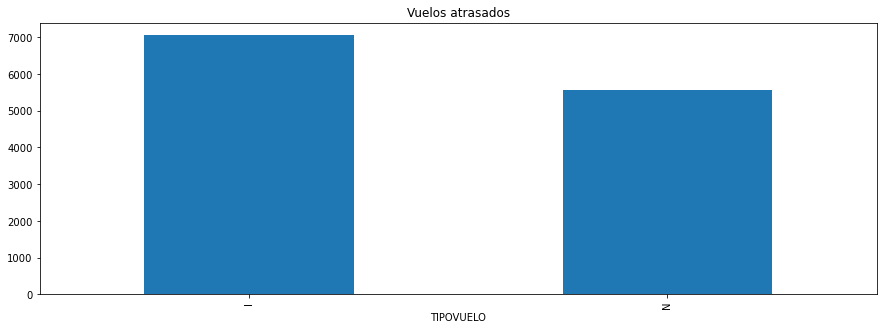

In [35]:
#Grafica los resultados
tVueloAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='TIPOVUELO'>

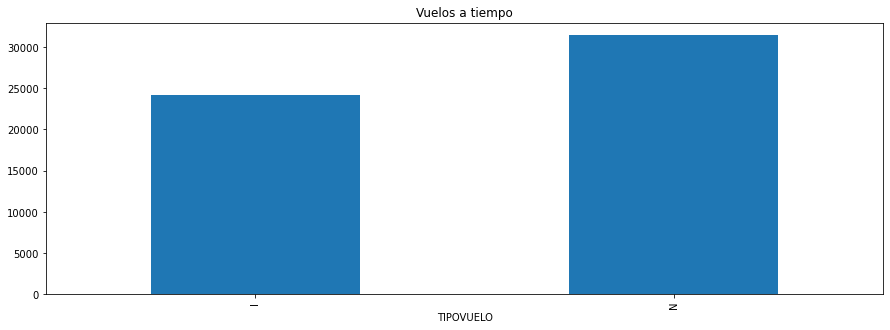

In [36]:
tVueloAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por tipo de vuelo'}, xlabel='TIPOVUELO'>

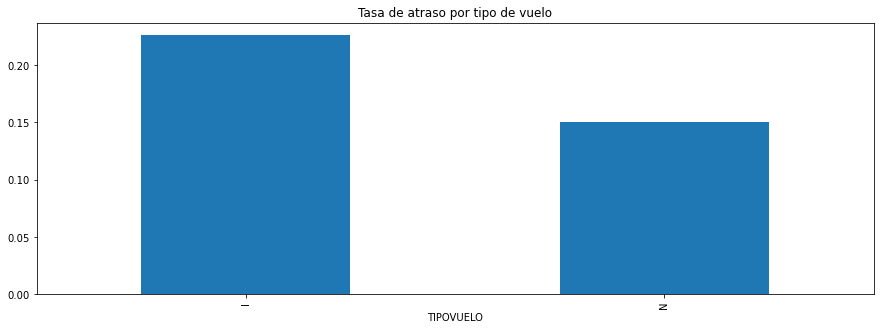

In [37]:
tVuelo_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por tipo de vuelo')

Se observa que los vuelos internacionles tiene casi una tasa de retraso casi 10% mayor que los vuelos nacionales.

### ¿Qué variables esperarías que más influyeran en predecir atrasos? 
El destino y la aerolinea son las variables que yo espero tengan mayor influencia en predecir los atrasos, seguidas de mes, día de la semana, y tipo de vuelo.  Temporada puede tener un efecto mínimo en la predicción.

# Pregunta 4
## Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

En primer lugar, se realizará el análisis de las tasas de retraso respecto a la hora de salida para saber si esta variable afecta los resultados.

In [38]:
#Tasa de atraso por periodo del día en que el vuelo salio

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por periodo de salida
hSalidaAtrasado = latamDFatrasado.groupby(['periodo_dia']).count().unstack(fill_value=0)['Fecha-I']
hSalidaAtiempo = latamDFatiempo.groupby(['periodo_dia']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por periodo de salida y las organiza de manera descendiente
hSalida_tasa_atraso = hSalidaAtrasado/(hSalidaAtrasado + hSalidaAtiempo)
hSalida_tasa_atraso = hSalida_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Tasa de atraso por periodo del dia'}, xlabel='periodo_dia'>

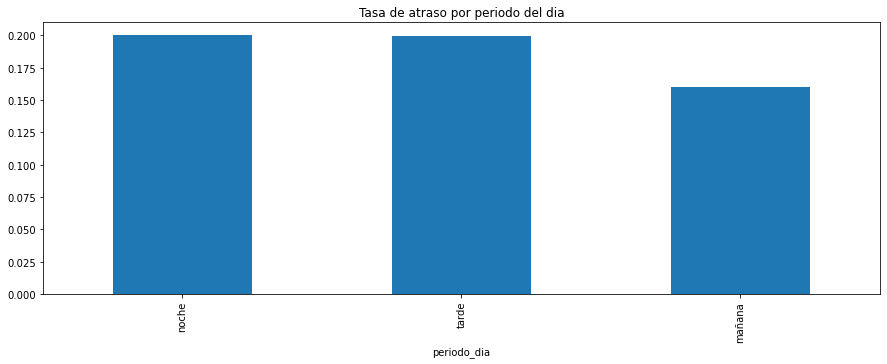

In [39]:
hSalida_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por periodo del dia')

Se observa que los vuelos en la mañana tiene una tasa de atraso menor a los vuelos de la tarde y de la noche.  Esto dos (noche y dia) no tiene gran diferencia en sus tasas de atraso.  Generaré una nueva columna que diferencia vuelos de la mañana con vuelos de la tarde/noche para tomar como variable de entrada para el modelo.

In [40]:
#Genera la nueva columna periodo_mañana
#Defino función que realiza la diferenciación entre atraso o no
def se_atraso(row):  
    if row['periodo_dia'] == 'mañana':
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe
latamDF['periodo_mañana']=latamDF.apply(lambda row: se_atraso(row),axis=1)

También se debe convertir la columna 'TIPOVUELO' a datos numéricos.

In [41]:
#Genera una nueva columna numerica para el tipo de vuelo
#Defino función que realiza la diferenciación entre atraso o no
def vuelo_inter(row):  
    if row['TIPOVUELO'] == 'I':
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe
latamDF['vuelo_int']=latamDF.apply(lambda row: vuelo_inter(row),axis=1)

Comenzaré entrenando un clasificador de tipo random forest.  En mi experiencia este tipo de modelos producen mejores resultados que otro tipo de clasificadores similares (k-means, svm, desition tree), solo siendo superados por redes neuronales o modelos modificados para ajustarse a un problema particular. Para esto es necesario mapear las variable de tipo texto como variables numéricas (one-hot encoding). Primero se aplica un filtrado para eliminar los outliers en el número de vuelos diarios retrasados.

In [42]:
#Se cuentan la cantidad de vuelos atrasados por dia
latamDF_atrasado = latamDF.loc[latamDF['atraso_15']==1]
countMD_atrasado = latamDF_atrasado.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()['Vlo-I']

#Se seleccionan solo los días con mas de 75 vuelos retrasados
countMD_atrasado = countMD_atrasado.to_frame()
countMD_atrasado_outliers = countMD_atrasado.loc[countMD_atrasado['Vlo-I']>85]

#Se seleccionan los datos de los vuelos que no estuvieron programados en días con mas de 80 vuelos retrasados
latamDF_no_outliers = latamDF.loc[latamDF['Fecha-I'].apply(lambda x: x.strftime('%Y-%m-%d') 
                                                           not in countMD_atrasado_outliers.index.strftime('%Y-%m-%d').to_list() )]

También se filtran los destinos especiales Cataratas de Iguacu, Cochabamba, Curitiba. Bra, Pisco Peru, Puerto Stanley, Quito, y Washington

In [43]:
#Lista con los códigos de los destinos especiales
destinos_especiales =['SBFI','SLCB','SBCT','SPSO','EGYP','SEQM','KIAD']

#Ciclo que elimina todos los datos que tienen un destino especial
for x in destinos_especiales:
    latamDF_no_outliers = latamDF_no_outliers[latamDF_no_outliers['Des-I']!=x]

In [79]:
#Genero el dataframe con las variable de entrada que ya son numéricas. Mes, tipo del vuelo, periodo mañana.
#X = latamDF[['MES','vuelo_int','periodo_mañana']]
X = latamDF_no_outliers[['periodo_mañana']]
#Utilizo la columna atraso_15 como los datos de salida
y = latamDF_no_outliers['atraso_15']

In [80]:
#Se aplica one-hot encoding a las variables de tipo texto  

#Ciudad de destino
#Xaux = pd.get_dummies(latamDF_no_outliers[['Des-I']])
#X = X.join(Xaux)
#X = Xaux

#Aerolinea
#Xaux = pd.get_dummies(latamDF_no_outliers[['Emp-I']])
#X = X.join(Xaux)

#Dia de la semana
#Xaux = pd.get_dummies(latamDF_no_outliers[['DIANOM']])
#X = X.join(Xaux)

In [81]:
#Se aplica encoding categorico a las variables de tipo texto  

#df.cc.astype('category').cat.codes



#Ciudad de destino
Xaux = latamDF_no_outliers['Des-I'].astype('category').cat.codes
X['Des-I'] = Xaux
#X = Xaux

#Aerolinea
Xaux = latamDF_no_outliers['Emp-I'].astype('category').cat.codes
X['Emp-I'] = Xaux


#Dia de la semana
Xaux = latamDF_no_outliers['DIANOM'].astype('category').cat.codes
X['DIANOM'] = Xaux

C:\Users\an2fe\AppData\Local\Temp/ipykernel_5704/4229429178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Des-I'] = Xaux
C:\Users\an2fe\AppData\Local\Temp/ipykernel_5704/4229429178.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Emp-I'] = Xaux
C:\Users\an2fe\AppData\Local\Temp/ipykernel_5704/4229429178.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [82]:
#Importa el clasificador, y la librería que permitirá realizar el train/test split de los datos disponibles,
#y evaluar el modelo por medio de la matriz de confusión
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [83]:
#Split estratificado 80-20 entre datos de entreanmiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Define el clasificador de Random Forest
#from sklearn.ensemble import RandomForestClassifier
#mdl = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=None,criterion='entropy',
#                             oob_score=True,class_weight='balanced_subsample')

from sklearn.ensemble import HistGradientBoostingClassifier
mdl = HistGradientBoostingClassifier(max_iter=200,max_leaf_nodes=20,min_samples_leaf=50
                                       ,validation_fraction=None,tol=1e-12)

In [84]:
#Undersampling aleatorio de la clase mayoritaria (vuelos a tiempo)
#Oversampling de la clase minoritaria (vuelos retrasados) utilizando la técnica SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over_mdl = SMOTE(sampling_strategy='not majority')
under_mdl = RandomUnderSampler(sampling_strategy='majority')
steps_mdl = [('over', over_mdl), ('under', under_mdl), ('model', mdl)]
pipeline_mdl = Pipeline(steps=steps_mdl)

In [85]:
#Entrena el random forest
pipeline_mdl.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy='not majority')),
                ('under', RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 HistGradientBoostingClassifier(max_iter=200, max_leaf_nodes=20,
                                                min_samples_leaf=50, tol=1e-12,
                                                validation_fraction=None))])

# Pregunta 5
## Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

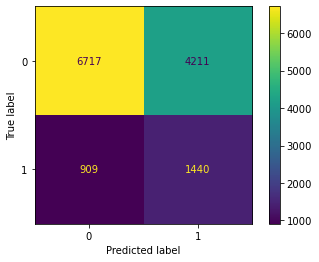

Precision A tiempo:
 0.6146595900439239
Precision demorado:
 0.6130268199233716
Positivos verdaderos A tiempo:
 0.8808025177025964
Positivos verdaderos demorados:
 0.25482215537073083


In [86]:
#Predicts and shows score predictions
y_pred=pipeline_mdl.predict(X_test)
    
CM1 = confusion_matrix(y_test, y_pred)
    
disp = ConfusionMatrixDisplay(confusion_matrix=CM1,display_labels=mdl.classes_)
disp.plot()
plt.show()

print('Precision A tiempo:\n',(CM1[0,0]/(CM1[0,0]+CM1[0,1])))
print('Precision demorado:\n',(CM1[1,1]/(CM1[1,0]+CM1[1,1])))
    
print('Positivos verdaderos A tiempo:\n',(CM1[0,0]/(CM1[0,0]+CM1[1,0])))
print('Positivos verdaderos demorados:\n',(CM1[1,1]/(CM1[0,1]+CM1[1,1])))

## Performance del modelo y pasos seguidos para mejorar
La primera versión del modelo de random forest no tiene un buen performance, Precision A tiempo: 0.7394043012687843, Precision demorado:  0.4586793198892843, Positivos verdaderos A tiempo: 0.8571875651992489, Positivos verdaderos demorados: 0.2859960552268245.

La primera acción a tomar para mejorar el performance será balancear los datos, ya que hay muchos mas datos de vuelos a tiempo que de vuelos demorados, lo cual tiende a influenciar el modelo. Luego de balancear los datos, solo se observaron mejoras menores (3%) en la presición de la predicción de los vuelos demoreados. Precision A tiempo:  0.7210658532208865 Precision  Demorado:  0.48717948717948717 Positivos verdaderos A tiempo: 0.8626167221208544 Positivos verdaderos demorados: 0.2811560693641619

La siguiente acción será cambiar diferentes parámetros del modelo. Para comparación, la configuración original del modelo es rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=None,criterion='entropy',oob_score=True,class_weight='balanced_subsample')

- n_estimators=500.  Considerable incremento en el tiempo de entrenamiento sin un aumento significativo del performance.
- criterion='gini'. El performance decrece de manera menor (46% para la predicción de los vuelos retrasados)
- max_features='auto'. No diferencia
- oob_score=False (opción por defecto).  Baja 3%
- bootstrap=False. Baja 3%
- class_weight=None (opción por defecto). Baja 2%

No hay mejoras considerables respecto a la versión balanceada del modelo.

La siguiente acción a tomar será limitar las variables utilizadas para la predicción.

- Inicialmente se utilizan solo las dos de mayor impacto (Ciudad de destino y aerolinea).  Se obtuvo una mejora de 5% en la precisión de los retrasados, pero baja la precisión de los vuelos a tiempo. Precision A tiempo: 0.6531055058312991 Precision demorado: 0.5455249903138318 Positivos verdaderos A tiempo: 0.8603072525902108 Positivos verdaderos demorados:  0.2684461391801716

- Ciudad de destino, aerolinea y tipo de vuelo: No hay mejora

- Ciudad de destino, aerolinea y dia de la semana: Sube precisión demorado, baja precisión a tiempo. Precision A tiempo:  0.6208869814020028 Precision demorado: 0.5825874694873882 Positivos verdaderos A tiempo: 0.871267252195734 Positivos verdaderos demorados: 0.2524682651622003

- Ciudad de destino, aerolinea, dia de la semana y mes: Baja precisión demorado.

- Ciudad de destino, aerolinea, dia de la semana y tipo de vuelo: No hay cambio.

- Ciudad de destino, aerolinea, dia de la semana y periodo de salida: Aumenta demorado, baja a tiempo. Precision A tiempo:   0.5908062618767532 Precision demorado: 0.6121188730219992 Positivos verdaderos A tiempo: 0.8666047252455535 Positivos verdaderos demorados: 0.2596594629993451

- Ciudad de destino, aerolinea, dia de la semana, periodo de salida, temporada alta: Baja demorado Precision A tiempo: 0.6408710519211734 Precision demorado: 0.5630684064847766 Positivos verdaderos A tiempo: 0.8656861553421661 Positivos verdaderos demorados: 0.2629732225300092

La mejor combinación de variables de entrada es Ciudad de destino, aerolinea, dia de la semana y periodo de salida

Ahora se revisaran diferentes modelos:
- Gradient Histogram Gradient Boosting Precision A tiempo: 0.6185315632619887 Precision demorado: 0.6068509147528222 Positivos verdaderos A tiempo: 0.8714849217457692 Positivos verdaderos demorados: 0.2695832612830711
- SVM: No converge con los parámetros actuales.
- Clasificador MLP: Precision A tiempo: 0.5818428184281843 Precision demorado: 0.6123639191290824 Positivos verdaderos A tiempo: 0.8659585910190911 Positivos verdaderos demorados: 0.2538684719535783

Es evidente que los diferentes modelos conducen a performance muy similares cuando convergen. Se seguiran explorando opciones respecto a las variables de entrada, utilizando random forest.

- Ciudad de destino, dia de la semana y periodo de salida: Precision A tiempo: 0.5375966900521677 Precision demorado: 0.6481774960380349 Positivos verdaderos A tiempo: 0.8706482155863073 Positivos verdaderos demorados: 0.24140475136491074
- Aerolinea, dia de la semana y periodo de salida: Precision A tiempo: 0.6618031162748806 Precision demorado: 0.5068924773532887 Positivos verdaderos A tiempo: 0.8544186046511628 Positivos verdaderos demorados: 0.2552558508528362

La ciudad de destino tiene una gran importancia en la predicción de los vuelos demorados, mientras que la aerolinea tiene un efecto importante en la predicción de los vuelos a tiempos.  Ambos son necesarios para un correcto balance de las predicciones.

### Test adicionales
- Se utilizo encoding categórico normalizado en lugar de one-hot encoding para las variables categóricas. Precision A tiempo: 0.6446607290423285 Precision demorado: 0.5595138306789607 Positivos verdaderos A tiempo: 0.869796828543112 Positivos verdaderos demorados: 0.2564841498559078
- Encoding categórico no normalizado: Precision A tiempo: 0.6200383246646591 Precision demorado: 0.582830025884383 Positivos verdaderos A tiempo: 0.8754187065189384 Positivos verdaderos demorados: 0.24496826835902086

En ambos casos, bajo ligeramente la precision de los vuelos demorados, y aumento ligeramente la precision de los vuelos a tiempo.  Sin embargo el tiempo de entrenamiento mejoró considerablemente. El encoding sin normalizar produce mejores resultados.

Con los nuevos tipos de datos, se probaran de nuevos los modelos
- Gradient Histogram Gradient Boosting: Precision A tiempo: 0.6146595900439239 Precision demorado: 0.6130268199233716 Positivos verdaderos A tiempo: 0.8808025177025964 Positivos verdaderos demorados: 0.25482215537073083
- 

## Exploración adicional

In [ ]:
#Se comparan los vuelos retrasados y los vuelos a tiempo. 
atrasados = latamDF.atraso_15.unique().tolist()
for x in atrasados:
    latamDF_week = latamDF.loc[latamDF['atraso_15']==x]
    countMD = latamDF_week.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
    ax = plt.scatter(countMD.index,countMD['Fecha-O'],label=x)

plt.axhline(y=85, color='r', linestyle='-')
plt.legend();
plt.show()

Se nota que existen tres rangos de fechas donde hay un número mucho mayor de vuelos retrasados que lo normal.  Estos rangos de fechas pueden considerarse como outliers, por lo cual se filtrarán del set de datos.

## Visualizacion de resultados

In [ ]:
y_pred_final=pipeline_mdl.predict(X)
latamDF_no_outliers_res = latamDF_no_outliers
latamDF_no_outliers_res['real']=y
latamDF_no_outliers_res['predicted']=y_pred_final


atrasados = latamDF.atraso_15.unique().tolist()
latamDF_trained_atrasados_real = latamDF_no_outliers_res.loc[latamDF_no_outliers_res['real']==1]
countMD_real = latamDF_trained_atrasados_real.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
ax = plt.scatter(countMD_real.index,countMD_real['Fecha-O'],label='real')


latamDF_trained_atrasados_predicted = latamDF_no_outliers_res.loc[latamDF_no_outliers_res['predicted']==1]
countMD_predicted = latamDF_trained_atrasados_predicted.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
ax = plt.scatter(countMD_predicted.index,countMD_predicted['Fecha-O'],label='predicted')

#ax = plt.scatter(countMD_predicted.index,countMD_predicted['Fecha-O']-countMD_real['Fecha-O'],label='diferencia')

plt.legend()
plt.show()

In [ ]:
latamDF_trained_atrasados_real = latamDF_no_outliers_res.loc[latamDF_no_outliers_res['real']==0]
countMD_real = latamDF_trained_atrasados_real.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
ax = plt.scatter(countMD_real.index,countMD_real['Fecha-O'],label='real')


latamDF_trained_atrasados_predicted = latamDF_no_outliers_res.loc[latamDF_no_outliers_res['predicted']==0]
countMD_predicted = latamDF_trained_atrasados_predicted.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
ax = plt.scatter(countMD_predicted.index,countMD_predicted['Fecha-O'],label='predicted')

#ax = plt.scatter(countMD_predicted.index,countMD_predicted['Fecha-O']-countMD_real['Fecha-O'],label='diferencia')

plt.legend()
plt.show()